# **Monte Carlo Simulation**

In [58]:
# Importing the necessary librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [59]:
# Defining the start and end for the data
start_date = '2023-04-01'
end_date = '2024-03-31'

In [60]:
# Retrieving data from the Yahoo Finance
ticker = ['CRM']
df_yf = pdr.get_data_yahoo(ticker, start=start_date, end = end_date)['Adj Close']
df_yf

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-03    196.233673
2023-04-04    196.942734
2023-04-05    195.055206
2023-04-06    192.298813
2023-04-10    191.240189
                 ...    
2024-03-22    307.769989
2024-03-25    306.059998
2024-03-26    305.829987
2024-03-27    301.380005
2024-03-28    301.179993
Name: Adj Close, Length: 249, dtype: float64

Text(0.5, 1.0, 'Stock Performance of Salesforce in 2023')

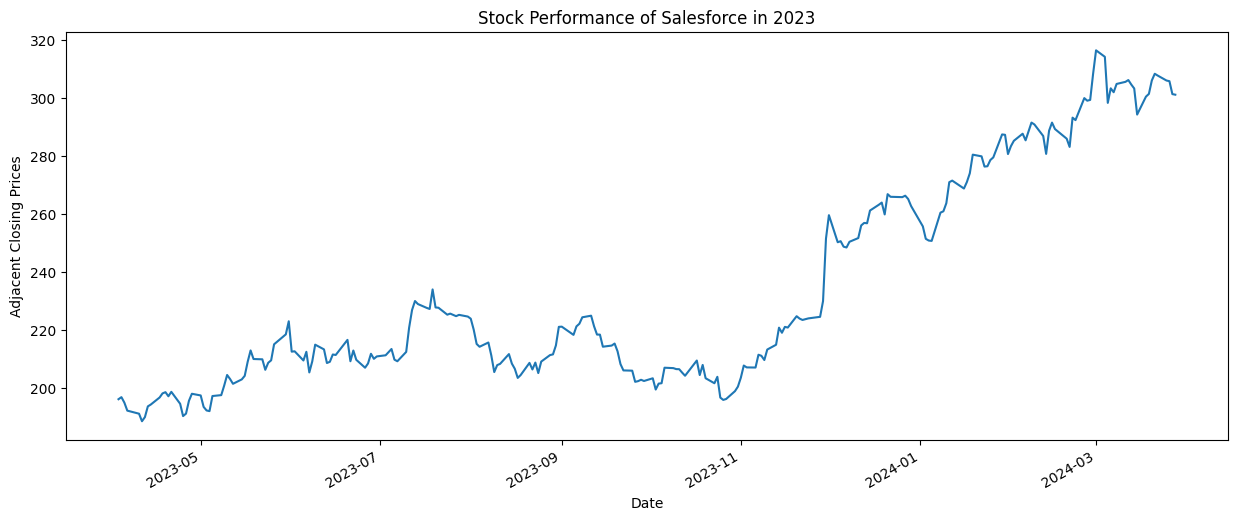

In [61]:
df_yf.plot(figsize = [15,6])
plt.xlabel('Date')
plt.ylabel("Adjacent Closing Prices")
plt.title("Stock Performance of Salesforce in 2023")

In [62]:
# Calculatin the percentage change in adjacent close prices.
stock_returns = np.log(1+df_yf.pct_change())
stock_returns.tail()

Date
2024-03-22   -0.002013
2024-03-25   -0.005572
2024-03-26   -0.000752
2024-03-27   -0.014657
2024-03-28   -0.000664
Name: Adj Close, dtype: float64

In [63]:
stock_returns

Date
2023-04-03         NaN
2023-04-04    0.003607
2023-04-05   -0.009630
2023-04-06   -0.014232
2023-04-10   -0.005520
                ...   
2024-03-22   -0.002013
2024-03-25   -0.005572
2024-03-26   -0.000752
2024-03-27   -0.014657
2024-03-28   -0.000664
Name: Adj Close, Length: 249, dtype: float64

Text(0, 0.5, 'Frequency')

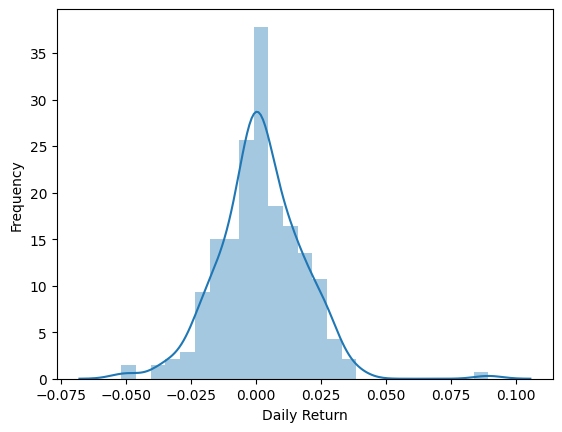

In [64]:
#Visualizing the distribution of daily return and stock prices.
sns.distplot(stock_returns.iloc[1:])
plt.xlabel ("Daily Return")
plt.ylabel ("Frequency")

<Axes: xlabel='Date'>

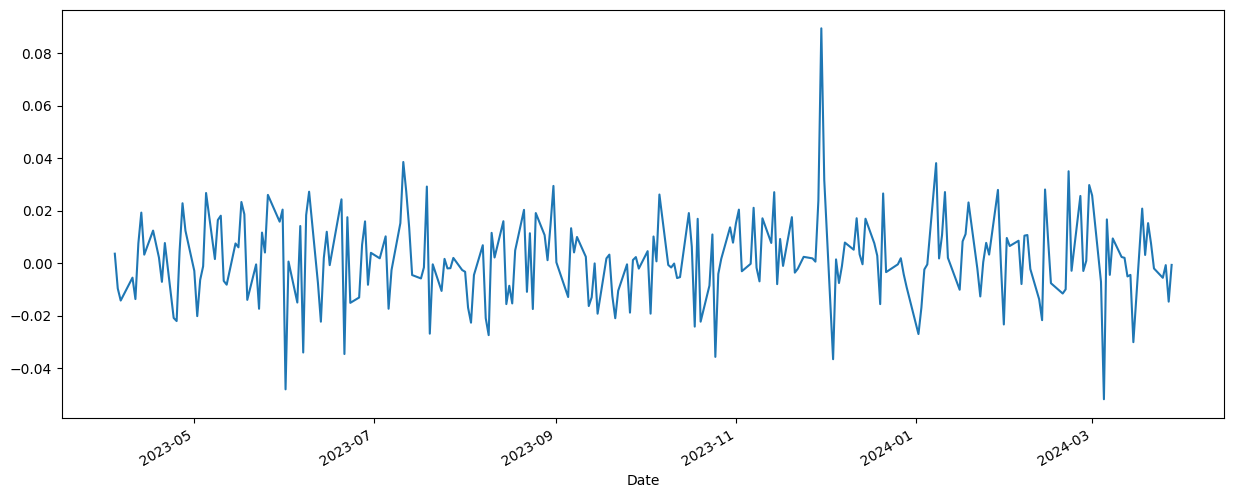

In [65]:
stock_returns.plot(figsize=(15,6))

In [66]:
# Calculating the mean and variance of the data.
u =stock_returns.mean()
var = stock_returns.var()

In [67]:
# Calculating the drift component of the model
drift = u - (0.5*var)
drift

0.0015956653845717239

In [68]:
#Calculating the standard deviation of the stock return
stddev = stock_returns.std()
stddev

0.016233401990163085

In [69]:
type(drift)

numpy.float64

In [70]:
type(stddev)

numpy.float64

In [71]:
np.array(drift)

array(0.00159567)

In [72]:
# Randomly generating a 10 x 2 array filled with random numbers between 0 and 1
x = np.random.rand(10,2)
x

array([[0.44181109, 0.29334805],
       [0.110511  , 0.16352788],
       [0.84924576, 0.20910399],
       [0.5276931 , 0.18982739],
       [0.73036409, 0.12080534],
       [0.08030011, 0.68655481],
       [0.36487005, 0.80705767],
       [0.84749504, 0.02681777],
       [0.08393446, 0.37775249],
       [0.77257991, 0.17547169]])

In [73]:
norm.ppf(x)

array([[-0.14637902, -0.54363001],
       [-1.22381509, -0.98006152],
       [ 1.0332039 , -0.80953413],
       [ 0.06947215, -0.87853255],
       [ 0.61391451, -1.17097036],
       [-1.40305571,  0.48610829],
       [-0.34547127,  0.86710469],
       [ 1.02574898, -1.92976838],
       [-1.37908379, -0.31138893],
       [ 0.74737013, -0.93276099]])

In [74]:
# Simulating the random fluctuations.
stdev = stock_returns.std()
days = 30
iterations = 100
Z = norm.ppf(np.random.rand(days, iterations))
Z

array([[-0.10612388,  1.97685439,  0.24033739, ...,  1.17744279,
         0.20564557,  0.30522698],
       [-0.65555263,  1.5987789 ,  1.68311228, ...,  1.73333859,
         0.47529413, -0.38462423],
       [ 1.91455322,  0.37217352,  1.51231118, ...,  0.13120449,
        -0.26166184,  0.63701625],
       ...,
       [ 0.22536417,  0.78114355,  0.36354515, ...,  0.58502342,
         1.11304612, -2.51735237],
       [ 1.24872548, -0.9135064 ,  0.57924842, ..., -0.8116301 ,
        -0.61103998, -0.98851449],
       [-1.01199103,  0.37318937, -0.37924542, ...,  0.97746469,
         0.97111662, -0.22211105]])

In [75]:
Z.shape

(30, 100)

In [76]:
# Calculating the daily return of the stock
get_daily_returns = np.exp(drift +stdev * Z)

In [77]:
get_daily_returns

array([[0.99987292, 1.03426056, 1.0055123 , ..., 1.0209255 , 1.00494618,
        1.00657204],
       [0.99099461, 1.02793228, 1.0293405 , ..., 1.03018011, 1.00935479,
        0.99536269],
       [1.03321508, 1.00766655, 1.02649042, ..., 1.00373251, 0.99735152,
        1.01200813],
       ...,
       [1.00526792, 1.01437868, 1.00752541, ..., 1.01115434, 1.0198588 ,
        0.96149153],
       [1.02210756, 0.98685353, 1.01105955, ..., 0.98848694, 0.99171095,
        0.98565263],
       [0.98527707, 1.00768316, 0.99544961, ..., 1.01761662, 1.01751176,
        0.99799207]])

In [78]:
len (get_daily_returns)

30

In [79]:
S0 = df_yf.iloc[-1]
S0

301.17999267578125

In [80]:
price_paths = np.zeros_like(get_daily_returns)

In [81]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
price_paths[0] = S0
price_paths

array([[301.17999268, 301.17999268, 301.17999268, ..., 301.17999268,
        301.17999268, 301.17999268],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [84]:
#calculates the price for each day based on the price from the previous day and the daily returns, and stores the simulated price paths in the price_paths array
for t in range (1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

In [85]:
price_paths

array([[301.17999268, 301.17999268, 301.17999268, ..., 301.17999268,
        301.17999268, 301.17999268],
       [298.46774928, 309.5926355 , 310.01676357, ..., 310.26963689,
        303.99746861, 299.78332806],
       [308.38137942, 311.96614177, 318.22923656, ..., 311.42772117,
        303.19233645, 303.38316578],
       ...,
       [359.2469916 , 337.48377558, 344.2566907 , ..., 342.95726794,
        295.91741451, 326.60057479],
       [367.18906502, 333.04705474, 348.0640139 , ..., 339.00877902,
        293.46454114, 321.91471582],
       [361.78296474, 335.60590979, 346.48018571, ..., 344.98096668,
        298.60362052, 321.26833232]])

In [86]:
price_paths[2, :]

array([308.38137942, 311.96614177, 318.22923656, 305.0882686 ,
       310.29082759, 299.68192747, 304.83593937, 292.38975086,
       297.81467415, 288.85599308, 287.35828499, 308.47906746,
       298.56313888, 294.0006068 , 295.97925314, 301.09889149,
       314.73669415, 308.246474  , 299.71856282, 297.99221134,
       296.4185655 , 294.44574008, 296.25477351, 297.23099631,
       299.04150894, 304.12869485, 299.8480191 , 301.26237238,
       306.61766757, 298.96039515, 289.39112045, 295.87955124,
       308.82003009, 307.20041654, 307.72591623, 287.53594057,
       309.65554824, 303.11363596, 310.53354408, 297.00779363,
       299.65381228, 295.7216034 , 307.15211327, 314.67268456,
       305.08473008, 300.60921759, 307.48272589, 309.86941188,
       303.69125898, 307.39297708, 300.32893002, 298.98627348,
       302.68890031, 295.07567409, 286.26733589, 299.58743677,
       297.52348744, 301.17904535, 300.14562808, 305.68987645,
       301.00520077, 302.54294551, 313.02644586, 303.47

In [87]:
price_paths.max()

393.94388801950686

In [88]:
price = pd.DataFrame(price_paths)

In [89]:


# Create a DataFrame with 30 rows and 100 columns (assuming 'price' is your DataFrame)
price1 = pd.DataFrame()

# Calculate the mean of each row
row_means = price.iloc[:, :100].mean(axis=1)

# Add the row means as a new column named 'Stock_Price' to a new DataFrame 'price1'
price1['Stock_Price'] = row_means

# Display the new DataFrame with the added column
print(price1)


    Stock_Price
0    301.179993
1    301.854431
2    302.455221
3    303.145340
4    303.370437
5    304.073676
6    304.849659
7    305.829147
8    306.070079
9    306.798245
10   307.156632
11   307.672423
12   308.654941
13   308.955153
14   309.753759
15   309.817443
16   310.623798
17   311.626588
18   311.052227
19   311.387117
20   311.113864
21   311.785694
22   312.332202
23   313.772245
24   314.758609
25   316.752518
26   318.224462
27   318.133209
28   319.238651
29   318.731187


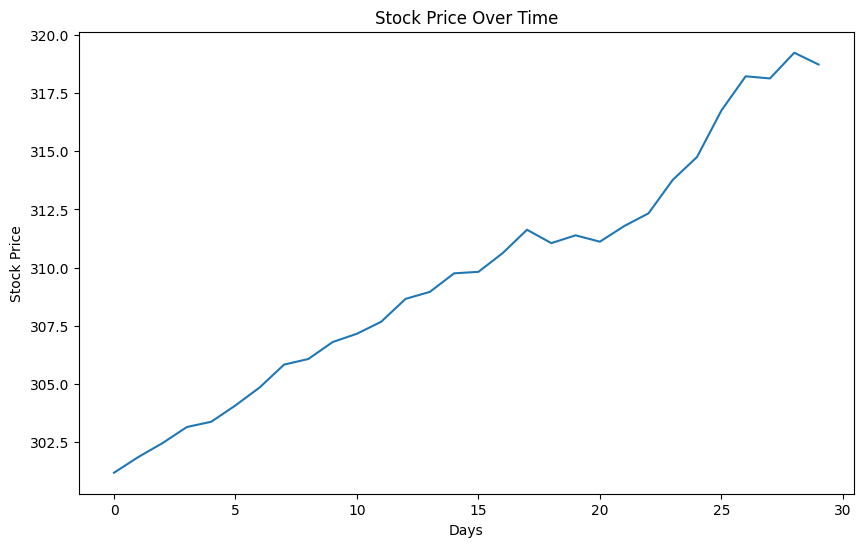

In [90]:
import matplotlib.pyplot as plt

# Plot the 'Stock_Price' column
price1['Stock_Price'].plot(figsize=(10, 6))

# Add title and labels
plt.title('Stock Price Over Time')
plt.xlabel('Days')
plt.ylabel('Stock Price')

# Show the plot
plt.show()



In [91]:
# Reset the index to start from 1
price1.reset_index(drop=True, inplace=True)

# Display the DataFrame with the reset index
print(price1)


    Stock_Price
0    301.179993
1    301.854431
2    302.455221
3    303.145340
4    303.370437
5    304.073676
6    304.849659
7    305.829147
8    306.070079
9    306.798245
10   307.156632
11   307.672423
12   308.654941
13   308.955153
14   309.753759
15   309.817443
16   310.623798
17   311.626588
18   311.052227
19   311.387117
20   311.113864
21   311.785694
22   312.332202
23   313.772245
24   314.758609
25   316.752518
26   318.224462
27   318.133209
28   319.238651
29   318.731187


Text(0.5, 1.0, 'Forecasting Stock Price Fluctuations for the Next 30 Days')

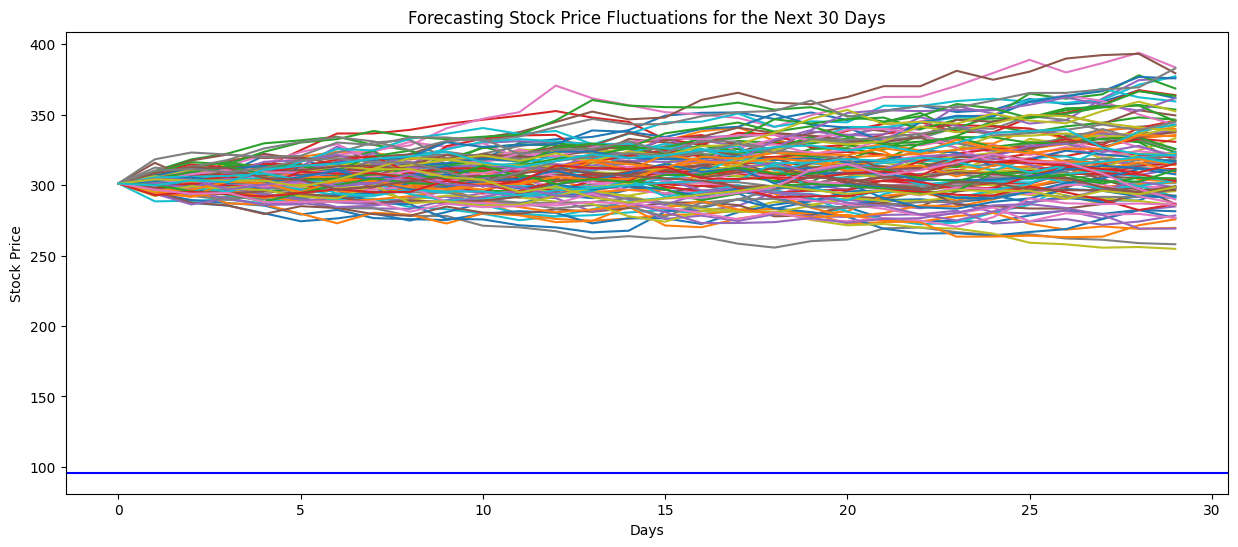

In [92]:
plt.figure(figsize=(15,6))
plt.axhline(y = 95.820000, color = 'b', linestyle = '-')
plt.plot(pd.DataFrame(price_paths).iloc[:,0:100])
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Forecasting Stock Price Fluctuations for the Next 30 Days")

# **Facebook Prophet Analysis**

In [93]:
import pandas as pd
from prophet import Prophet

In [94]:
# Retrieving the data from yahoo finance
ticker = ['CRM']
df_yf = pdr.get_data_yahoo(ticker, start=start_date, end = end_date)['Adj Close']
fb_data = pd.DataFrame(df_yf)

[*********************100%%**********************]  1 of 1 completed


In [95]:
# Renaming the column names to initiate the analysis
fb_data.reset_index(inplace=True)
fb_data = fb_data.rename(columns={'Date': 'ds','Adj Close':'y'})
print(fb_data)


            ds           y
0   2023-04-03  196.233673
1   2023-04-04  196.942734
2   2023-04-05  195.055206
3   2023-04-06  192.298813
4   2023-04-10  191.240189
..         ...         ...
244 2024-03-22  307.769989
245 2024-03-25  306.059998
246 2024-03-26  305.829987
247 2024-03-27  301.380005
248 2024-03-28  301.179993

[249 rows x 2 columns]


In [96]:
# Initilaizes the prophet model and fits the historical data.
m = Prophet()
m.fit(fb_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxm61oeyp/8_5lluqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxm61oeyp/jmpzqyoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87428', 'data', 'file=/tmp/tmpxm61oeyp/8_5lluqf.json', 'init=/tmp/tmpxm61oeyp/jmpzqyoj.json', 'output', 'file=/tmp/tmpxm61oeyp/prophet_model91yshmci/prophet_model-20240412235115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
# Creating the future dates to be predicted
future = m.make_future_dataframe(periods = 30)
future.tail()
future

,ds
0,2023-04-03
1,2023-04-04
2,2023-04-05
3,2023-04-06
4,2023-04-10
...,...
274,2024-04-23
275,2024-04-24
276,2024-04-25
277,2024-04-26


In [98]:
# Generates forecast using the fitted Prophet model and displaying a few rows of the forecasted values along with their lower and upper bounds.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
274,2024-04-23,326.104960,317.451113,335.203516
275,2024-04-24,326.377202,318.063164,334.367950
276,2024-04-25,327.951727,319.980525,336.683840
277,2024-04-26,328.958517,320.229762,338.556043
278,2024-04-27,331.043184,322.702969,340.204573


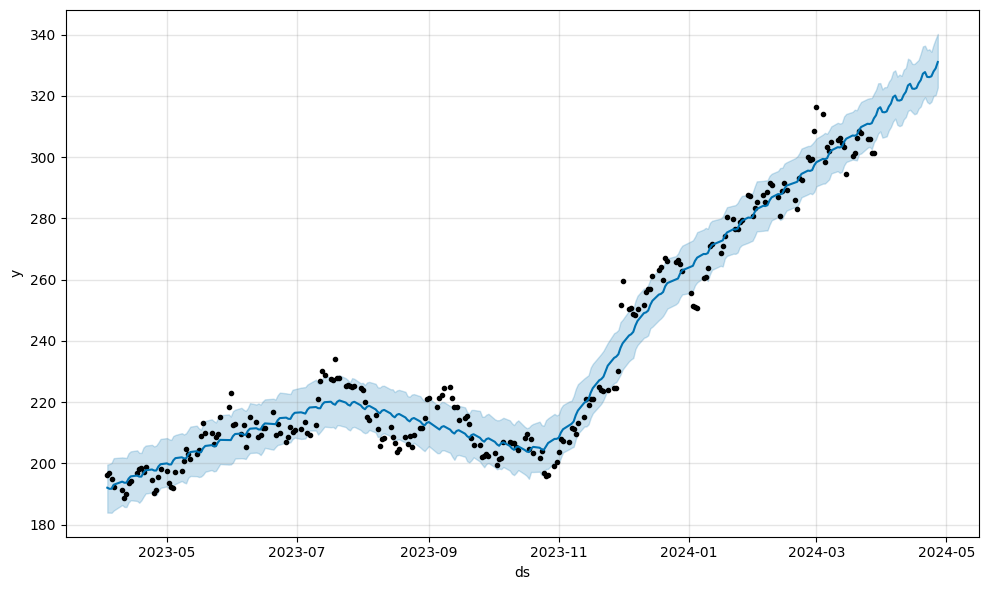

In [99]:
fig1 = m.plot(forecast)

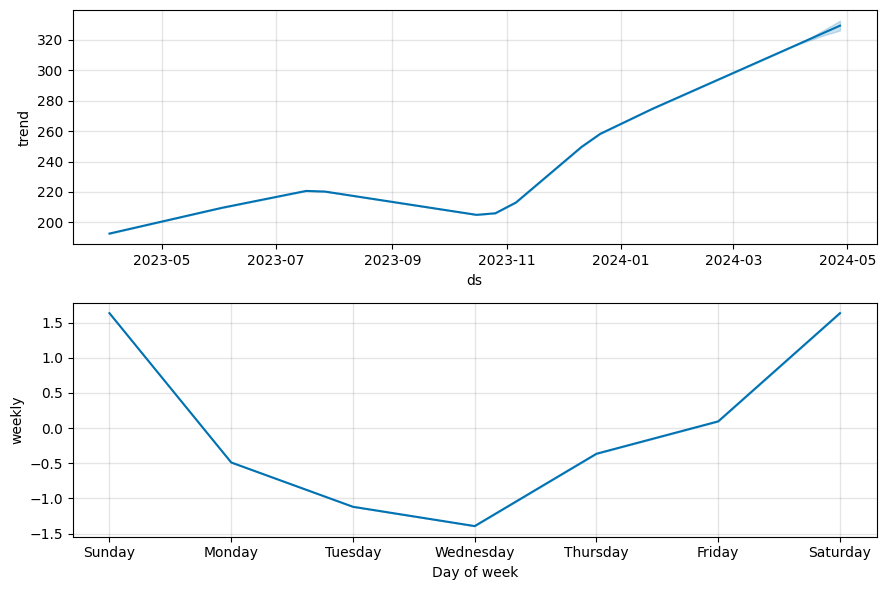

In [100]:
fig2 = m.plot_components(forecast)

In [101]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [102]:
plot_components_plotly(m, forecast)

# **Time Series - Moving Average**

In [103]:
!pip install tabulate

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [105]:
myticker = ['CRM']

df = pdr.get_data_yahoo(myticker, start='2023-04-01')['Close']
df.columns = {'Close Price'}
df.head(10)

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-03    196.490005
2023-04-04    197.199997
2023-04-05    195.309998
2023-04-06    192.550003
2023-04-10    191.490005
2023-04-11    188.889999
2023-04-12    190.320007
2023-04-13    194.020004
2023-04-14    194.649994
2023-04-17    197.080002
Name: Close, dtype: float64

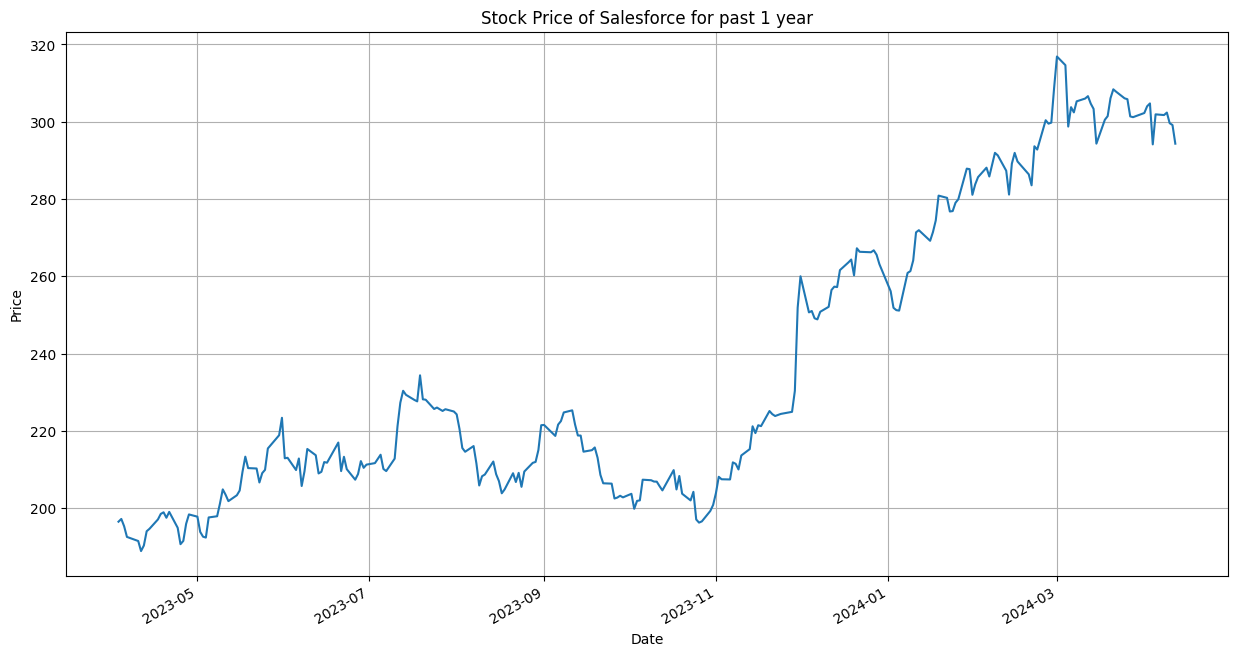

In [106]:
df.plot(figsize =(15,8))
plt.grid()
plt.ylabel("Price")
plt.title('Stock Price of Salesforce for past 1 year')
plt.show()

In [107]:
df = pd.DataFrame(df)
df

,Close
Date,
2023-04-03,196.490005
2023-04-04,197.199997
2023-04-05,195.309998
2023-04-06,192.550003
2023-04-10,191.490005
...,...
2024-04-08,301.730011
2024-04-09,302.369995
2024-04-10,299.619995


In [108]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

,Close,SMA20,SMA50
Date,,,
2023-04-03,196.490005,196.490005,196.490005
2023-04-04,197.199997,196.845001,196.845001
2023-04-05,195.309998,196.333333,196.333333
2023-04-06,192.550003,195.387501,195.387501
2023-04-10,191.490005,194.608002,194.608002


In [109]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)

In [110]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2023-04-03,196.490005,196.490005,196.490005,0.0,NaN
2023-04-04,197.199997,196.845001,196.845001,0.0,0.0
2023-04-05,195.309998,196.333333,196.333333,0.0,0.0
2023-04-06,192.550003,195.387501,195.387501,0.0,0.0
2023-04-10,191.490005,194.608002,194.608002,0.0,0.0


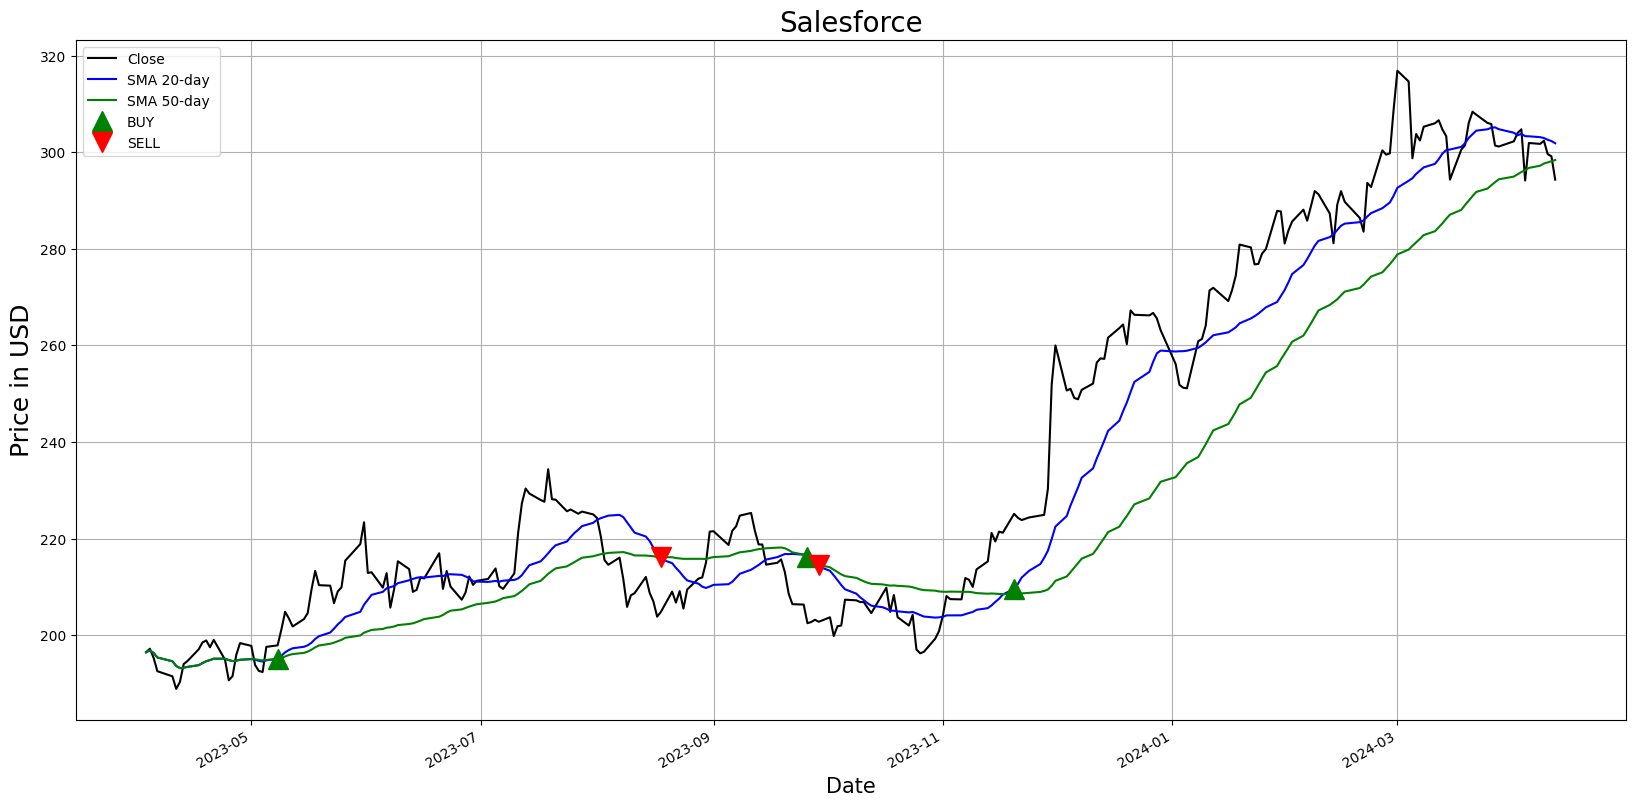

In [112]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages
df['Close'].plot(color = 'k', label= 'Close')
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ')
df['SMA50'].plot(color = 'g', label = 'SMA 50-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index,
         df['SMA20'][df['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index,
         df['SMA50'][df['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Salesforce', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# **Time Series - Exponential Moving Average**

In [113]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sb
!pip install yfinance

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

In [115]:
tickers = 'CRM'

In [116]:
start_date = '2023-04-01'

In [117]:
tickers = 'CRM'
mydata = pdr.get_data_yahoo(tickers, start = start_date)['Close']
mydata

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-03    196.490005
2023-04-04    197.199997
2023-04-05    195.309998
2023-04-06    192.550003
2023-04-10    191.490005
                 ...    
2024-04-08    301.730011
2024-04-09    302.369995
2024-04-10    299.619995
2024-04-11    299.149994
2024-04-12    294.320007
Name: Close, Length: 259, dtype: float64

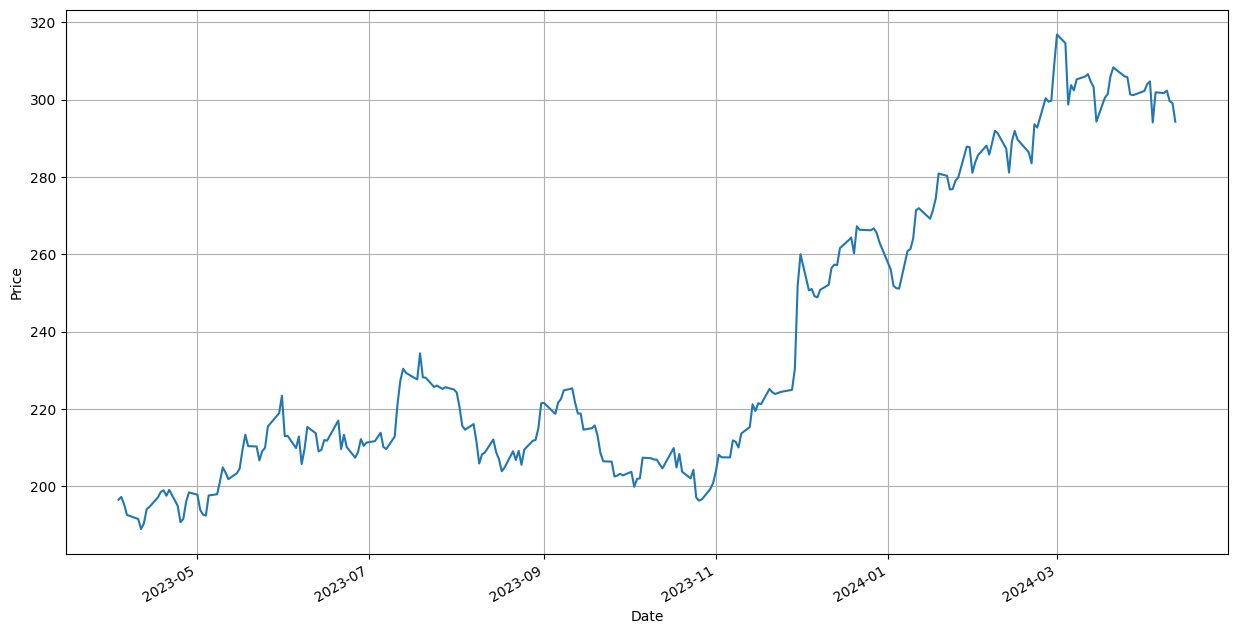

In [118]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel('Price')
plt.show()

In [119]:
df = pd.DataFrame(mydata)
df

,Close
Date,
2023-04-03,196.490005
2023-04-04,197.199997
2023-04-05,195.309998
2023-04-06,192.550003
2023-04-10,191.490005
...,...
2024-04-08,301.730011
2024-04-09,302.369995
2024-04-10,299.619995


In [120]:
df['EMA20'] = df['Close'].ewm(span = 20, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-04-03 to 2024-04-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   259 non-null    float64
 1   EMA20   259 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


In [121]:
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-04-03 to 2024-04-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   259 non-null    float64
 1   EMA20   259 non-null    float64
 2   EMA50   259 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


In [122]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [123]:
df['Position'] = df['Signal'].diff()

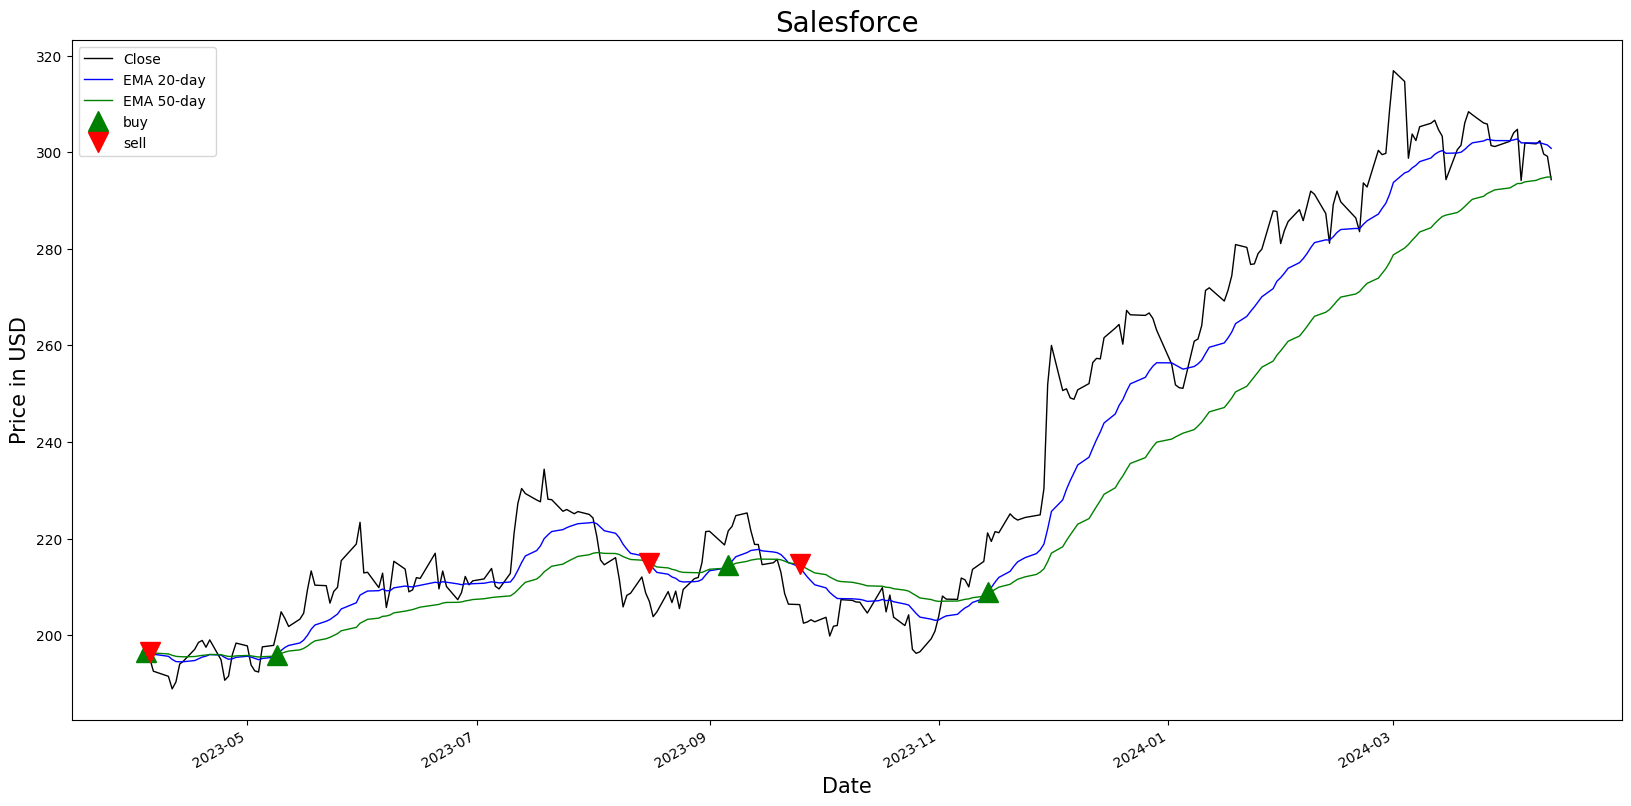

<Figure size 640x480 with 0 Axes>

In [124]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages
df['Close'].plot(color = 'k', lw = 1, label = 'Close')
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ')
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index,
         df['EMA20'][df['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index,
         df['EMA50'][df['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Salesforce' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()